##### This jupyter notebook is a continuation from the other notebook, so this is a new model for the previous data, without using the MSCI WM variable.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statistics
import math
import scipy.stats as stats
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
import scipy
from scipy import stats
from sklearn.metrics import mean_squared_error

    years  Gold_average_AJ  Gold_closing_AJ  ten_year_TIPS  five_year_TIPS  \
0    2004           409.53           438.00           1.83            1.04   
1    2005           444.99           513.00           1.81            1.50   
2    2006           604.34           635.70           2.31            2.28   
3    2007           696.43           836.50           2.29            2.15   
4    2008           872.37           865.00           1.77            1.30   
5    2009           973.66          1104.00           1.66            1.06   
6    2010          1226.66          1410.25           1.15            0.26   
7    2011          1573.16          1574.50           0.55           -0.41   
8    2012          1668.86          1664.00          -0.48           -1.19   
9    2013          1409.51          1201.50           0.07           -0.76   
10   2014          1266.06          1199.25           0.44           -0.09   
11   2015          1158.86          1060.70           0.45      

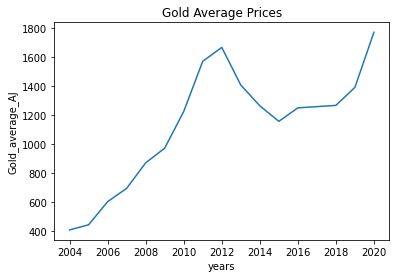

In [2]:
# Data from all the different economic data, atleast until now.
ten_year_treasury_inflation_indexed_security = pd.read_csv(r"data\10-year-treasury-inflation-indexed-security.csv")
five_year_treasury_inflation_indexed_security = pd.read_csv(r"data\5-year treasury inflation-indexed security.csv")
Gold_annual_average_prices_adjusted_inflation = pd.read_csv("data\Gold-annual-average-prices-adjusted-for-inflation.csv")
Gold_annual_prices_inflation_Adjusted = pd.read_csv("data\Gold-annual-prices-inflation-Adjusted.csv")
MSCI_Emerging_Markets_Historical_Data = pd.read_csv("data\MSCI Emerging Markets Historical Data.csv")
MSCI_World_data_history = pd.read_csv("data\MSCI World data history.csv")
ten_year_treasury_rate_annual_average = pd.read_csv(r"data\ten-year-treasury-rate-annual-average-yield.csv")
world_gdp_gross_domestic_product = pd.read_csv("data\world-gdp-gross-domestic-product.csv")

# transforming the MSCI Date and Prices data for later use in one function .
MSCI_Emerging_Markets_Historical_Data['Year'] = MSCI_Emerging_Markets_Historical_Data.apply(lambda row: row.Date.split(sep=" ")[1], axis=1)
MSCI_Emerging_Markets_Historical_Data['Price'] = MSCI_Emerging_Markets_Historical_Data.apply(lambda row: row.Price.replace(",",""), axis=1)

MSCI_World_data_history['Year'] = MSCI_World_data_history.apply(lambda row: row.Date.split(sep=" ")[1], axis=1)
MSCI_World_data_history['Price'] = MSCI_World_data_history.apply(lambda row: row.Price.replace(".",""), axis=1)
MSCI_World_data_history['Price'] = MSCI_World_data_history.apply(lambda row: row.Price.replace(",","."), axis=1)

def averages(dataframe):
    # function for annual averages, enters the dataframes above, and return 
    # the annual average price and the year.
    averages = []
    years = list(dict.fromkeys(dataframe["Year"]))
    for i in years:
        a = dataframe[dataframe["Year"]== i]
        values = pd.to_numeric(a["Price"])
        averages.append(round(statistics.mean(values),2))
    return(pd.DataFrame(averages,years))

MSCI_Emerging_Markets_annual_average = averages(MSCI_Emerging_Markets_Historical_Data)
MSCI_Emerging_Markets_annual_average.columns =['Annual Average Prices']
MSCI_Emerging_Markets_annual_average = MSCI_Emerging_Markets_annual_average.iloc[1:,:]

MSCI_World_annual_average = averages(MSCI_World_data_history)
MSCI_World_annual_average.columns =['Annual Average Prices']
MSCI_World_annual_average = MSCI_World_annual_average.iloc[1:,:]


# Next it is necessary to place all the necessary data from all variables in the same
# dataframe, from 2004 to 2020.

# years
years = Gold_annual_prices_inflation_Adjusted.iloc[1:18,0]
years = years.iloc[::-1]
years.reset_index(drop=True,inplace=True)

# Gold annual average closing prices adusted for inflation
Gold_average_AJ = Gold_annual_average_prices_adjusted_inflation.iloc[1:18,1]
Gold_average_AJ = Gold_average_AJ.iloc[::-1]
Gold_average_AJ.reset_index(drop=True,inplace=True)

# Gold annual closing prices adjusted for inflation.
Gold_closing_AJ = Gold_annual_prices_inflation_Adjusted.iloc[1:18,1] 
Gold_closing_AJ = Gold_closing_AJ.iloc[::-1]
Gold_closing_AJ.reset_index(drop=True,inplace=True)

# 10 year treasury inflation indexed secuurity.
ten_year_TIPS = ten_year_treasury_inflation_indexed_security.iloc[1:,1]
ten_year_TIPS.reset_index(drop=True,inplace=True)

# 5 year treasury inflation indexed secuurity.
five_year_TIPS = five_year_treasury_inflation_indexed_security.iloc[1:,1]
five_year_TIPS.reset_index(drop=True,inplace=True)

# MSCI emerging markets index annual average prices.
MSCI_EM = MSCI_Emerging_Markets_annual_average['Annual Average Prices']
MSCI_EM = MSCI_EM.iloc[::-1]
MSCI_EM.reset_index(drop=True,inplace=True)

# 10 year treasury rate annual average.
ten_year_TR = ten_year_treasury_rate_annual_average.iloc[1:18,1]
ten_year_TR = ten_year_TR.iloc[::-1]
ten_year_TR.reset_index(drop=True,inplace=True)

# world gdp gross domestic product Per capita (US $)
world_gdp = world_gdp_gross_domestic_product.iloc[44:63,2]
world_gdp.reset_index(drop=True,inplace=True)

# the new aggregated dataset, the main dataset from the analysis.
df = pd.concat([years,Gold_average_AJ,Gold_closing_AJ,ten_year_TIPS,five_year_TIPS,MSCI_EM,ten_year_TR,world_gdp],axis=1)
df.columns = ["years","Gold_average_AJ","Gold_closing_AJ","ten_year_TIPS","five_year_TIPS","MSCI_EM","ten_year_TR","world_gdp"]
print(df,"\n")

graph1 = sns.lineplot(x = df.iloc[:,0], y = df.iloc[:,1]).set_title('Gold Average Prices')
print(graph1)

{'whiskers': [<matplotlib.lines.Line2D at 0x14d148790a0>,
 'caps': [<matplotlib.lines.Line2D at 0x14d148797c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d1486ecd0>],
 'medians': [<matplotlib.lines.Line2D at 0x14d14879ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d148872b0>],
 'means': []}

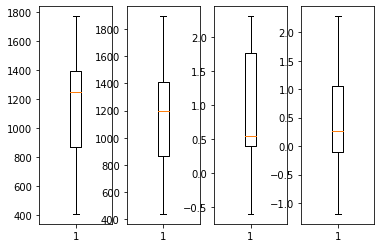

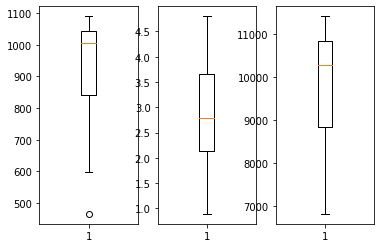

In [3]:
#trying to find outliers.
fig, axs = plt.subplots(1,4)
axs[0].boxplot(Gold_average_AJ)
axs[1].boxplot(Gold_closing_AJ)
axs[2].boxplot(ten_year_TIPS)
axs[3].boxplot(five_year_TIPS)

fig1, axs1 = plt.subplots(1,3)
axs1[0].boxplot(MSCI_EM)
axs1[1].boxplot(ten_year_TR)
axs1[2].boxplot(world_gdp)

In [4]:
# outliers:
# MSCI Emerging countries outliers
print(MSCI_EM[MSCI_EM < 500])

# few data points and dont seem to e necessary to remove a observation from the
# dataset
df.iloc[0,:]

0    465.49
Name: Annual Average Prices, dtype: float64


years              2004.0000
Gold_average_AJ     409.5300
Gold_closing_AJ     438.0000
ten_year_TIPS         1.8300
five_year_TIPS        1.0400
MSCI_EM             465.4900
ten_year_TR           4.2700
world_gdp          6824.0942
Name: 0, dtype: float64

In [5]:
# trying to fit a good multiple Linear Regression model to represent the data.
# independent variables without years
x = df.iloc[:,[2,3,4,5,6,7,]]

# dependent variables.
y = df["Gold_average_AJ"]

# regression modeland fit.
reg = LinearRegression()
reg.fit(x,y)

# Return the coefficient of determination R^2 of the prediction.
print("\ncoefficient of determination R^2:",reg.score(x,y),"\n")

# model coefficients:
print("model coefficients:",reg.coef_,"\n")

#model intercept:
print("model intercept:",reg.intercept_,"\n")

x = sm.add_constant(x)
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())
#print(res.predict())
#print(res.params)


coefficient of determination R^2: 0.9887117093580572 

model coefficients: [ 5.06142497e-01 -1.72898698e+01 -1.17245654e+02  2.35595768e-01
 -6.34599202e+00  4.02644416e-02] 

model intercept: 22.674465543341285 

                            OLS Regression Results                            
Dep. Variable:        Gold_average_AJ   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.78e-09
Time:                        07:22:06   Log-Likelihood:                -87.711
No. Observations:                  17   AIC:                             189.4
Df Residuals:                      10   BIC:                             195.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                     

C:\Users\erick\anaconda3\envs\Analysis\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\erick\anaconda3\envs\Analysis\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# predicted values:
predicted = res.predict()

# Mean Square Error(MSE):
print("MSE:",mean_squared_error(y, predicted))

# Root Mean Square Error(RMSE):
print("RMSE:",math.sqrt(mean_squared_error(y, predicted)))

MSE: 1774.1235457543444
RMSE: 42.120345983317186


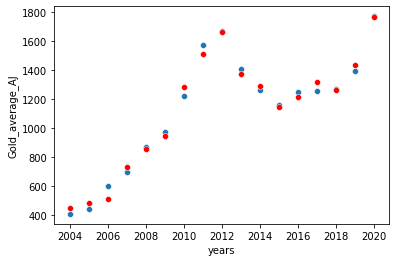

In [13]:
# residual analysis:

# residuals:
residuals = Gold_average_AJ - predicted

# multiple linear regression graph: (adjusted and predicted)
predicted = res.predict()

sns.scatterplot(x = df.iloc[:,0],y=y)
sns.scatterplot(x=df.iloc[:,0],y=predicted,color="red")

# leverage calculation. First manual using the formula: H = X'*(X*X')^-1*X
a = np.array(df.iloc[:,[2,4,5]])
H = np.dot(np.dot(a,np.linalg.inv(np.dot(a.transpose(),a))),a.transpose())
leaverage = H.diagonal()

influence = res.get_influence()

# leverage calculation automatic:
leverage_python = influence.hat_matrix_diag

# standardized and studentized residuals.
standardized_residuals = np.array(influence.resid_studentized_internal)
studentized_residuals = np.array(influence.resid_studentized_external)

# cook's distance for each observation.
cooks = influence.cooks_distance

# adding the standardized and studentized residuals to the datatable.
df["standardized_residuals"] = standardized_residuals
df["studentized_residuals"] = studentized_residuals

Text(0.5, 1.0, 'Observed vs Predicted')
Text(0.5, 1.0, 'residuals vs predicted values')
Text(0.5, 1.0, 'studentized residuals vs predicted values')


AttributeError: 'PairGrid' object has no attribute 'set_title'

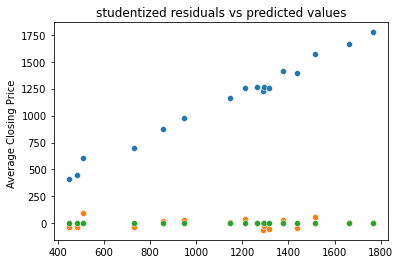

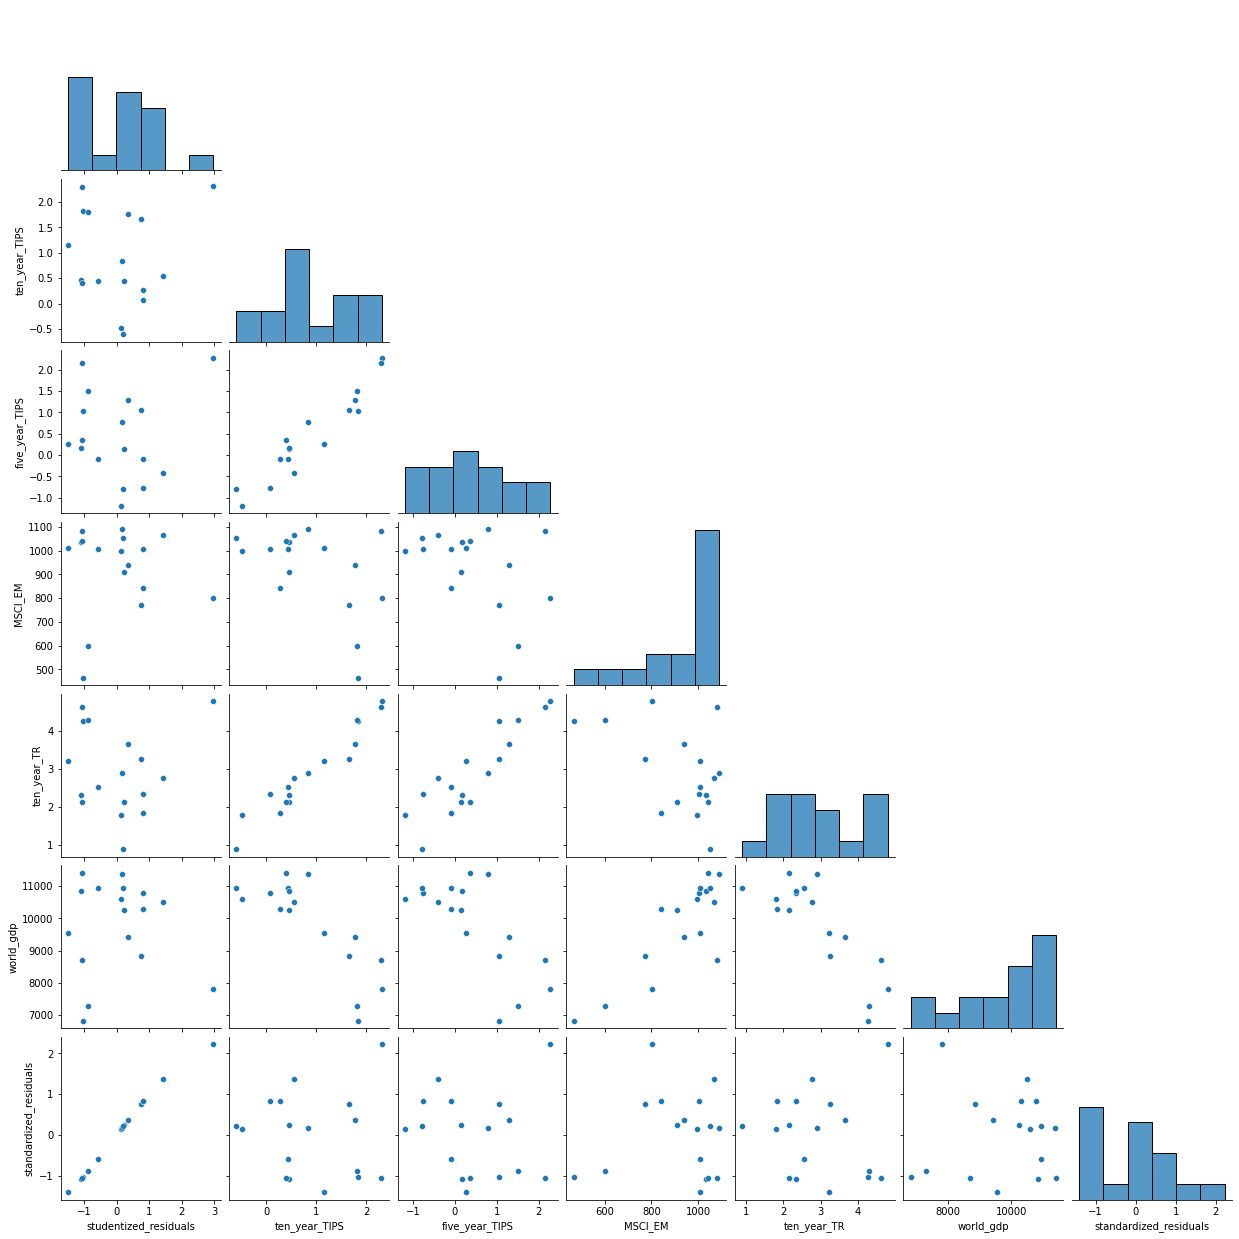

In [14]:
# Scatterplot of Observed vs Predicted:
sns.scatterplot(x= predicted, y= Gold_average_AJ).set_title("Observed vs Predicted")

Text(0.5, 1.0, 'residuals vs predicted values')

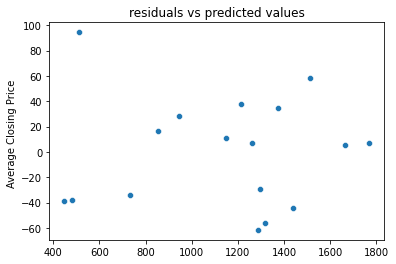

In [15]:
# residuals scatterplot (residuals vs predicted values).
sns.scatterplot(x = predicted,y = residuals).set_title("residuals vs predicted values")

Text(0.5, 1.0, 'studentized residuals vs predicted values')

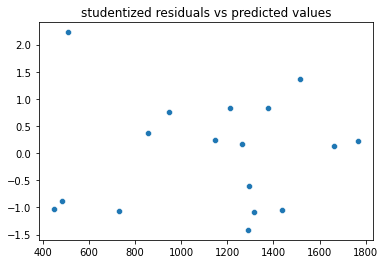

In [16]:
# studentized residuals plot.
sns.scatterplot(x = predicted,y = standardized_residuals).set_title("studentized residuals vs predicted values")

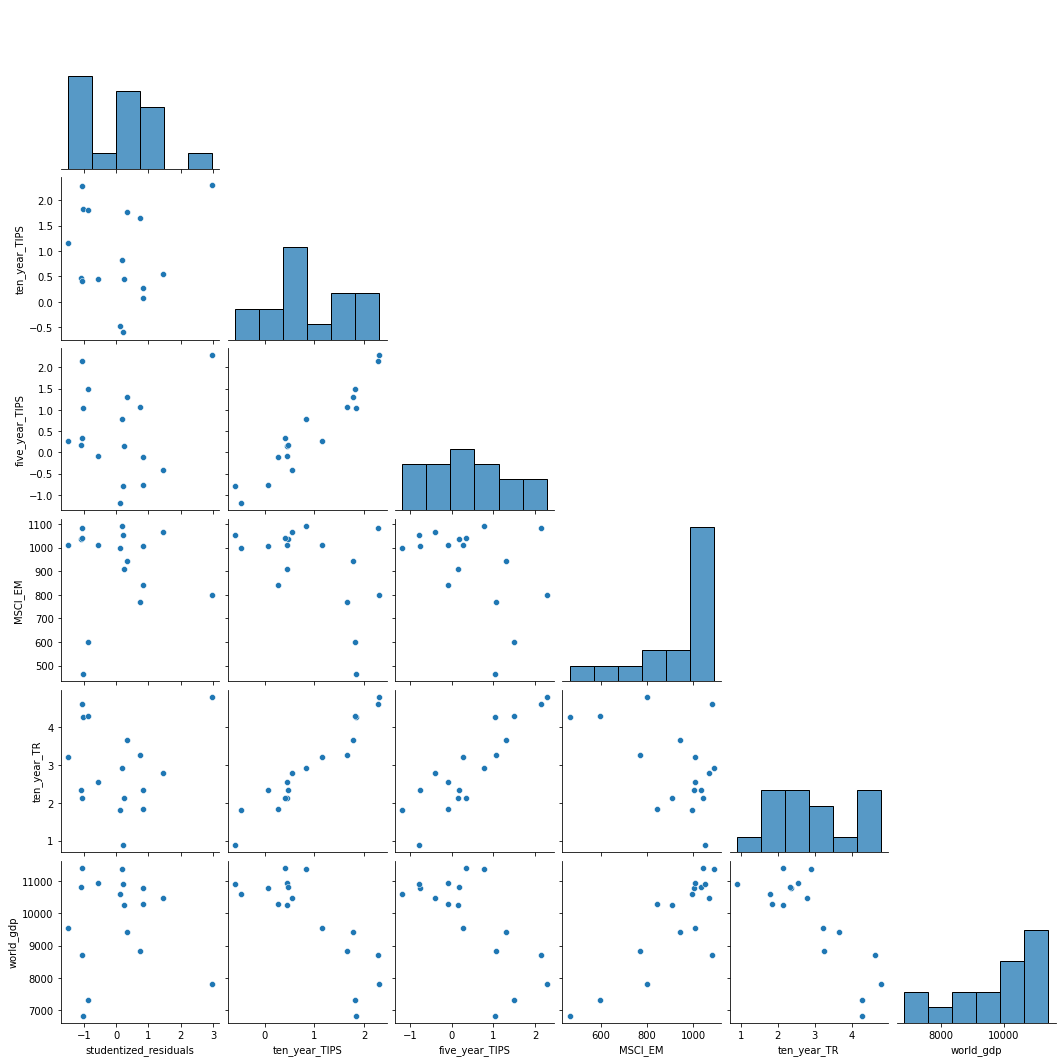

In [18]:
# pairplot for standardized residuals vs independent variables. (Gold closing AJ)
sns.pairplot(df.iloc[:,[9,3,4,5,6,7]],corner=True)

ShapiroResult(statistic=0.9318861365318298, pvalue=0.234008327126503)
KstestResult(statistic=0.23529411764705882, pvalue=0.7506071234246195)
AndersonResult(statistic=0.4888971886877691, critical_values=array([0.501, 0.571, 0.685, 0.799, 0.951]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


((array([-1.7512281 , -1.29947609, -1.01741764, -0.79927841, -0.61386703,
         -0.44755083, -0.29283065, -0.14485444,  0.        ,  0.14485444,
          0.29283065,  0.44755083,  0.61386703,  0.79927841,  1.01741764,
          1.29947609,  1.7512281 ]),
  array([-1.41289139, -1.09047972, -1.057348  , -1.04960966, -1.02440746,
         -0.87834567, -0.59847744,  0.13356421,  0.17658445,  0.21644213,
          0.24760066,  0.36456117,  0.76621151,  0.83219084,  0.83475789,
          1.36764099,  2.2257057 ])),
 (1.0480843906548831, 0.0031588354683618693, 0.9680935971795865))

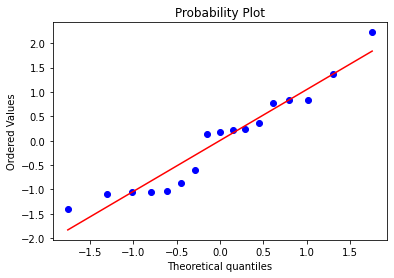

In [20]:
# Normality tests:
# shapiro-wilk
test1 = scipy.stats.shapiro(standardized_residuals)
print(test1)

# Kolmogorov-Smirnov:
normal = np.random.normal(0,1,17)
test2 = stats.ks_2samp(standardized_residuals,normal,alternative='two-sided')
print(test2)

# Anderson-Darling:
test3 = scipy.stats.anderson(standardized_residuals,"norm")
print(test3)

# qqplot:
scipy.stats.probplot(standardized_residuals, dist="norm", plot=plt)

C:\Users\erick\anaconda3\envs\Analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='studentized_residuals', ylabel='Density'>

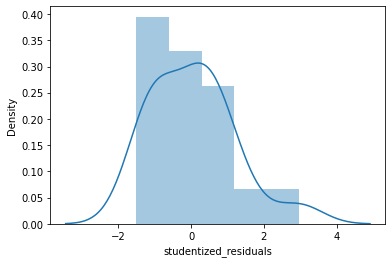

In [21]:
# residual histogram.
sns.distplot(df.iloc[:,9],bins=5)

C:\Users\erick\anaconda3\envs\Analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

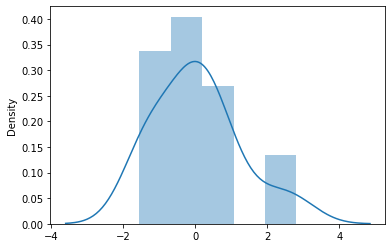

In [23]:
# normal histogram.
sns.distplot(normal,bins=5)

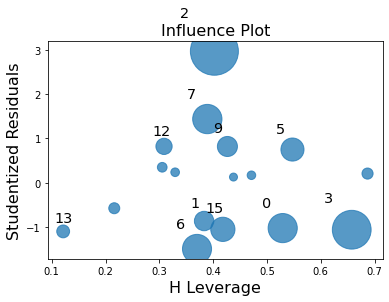

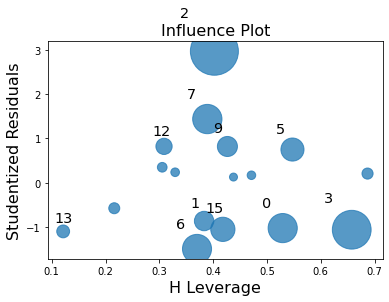

In [24]:
# influence plot.
sm.graphics.influence_plot(res,criterion="cooks",alpha=0.5)

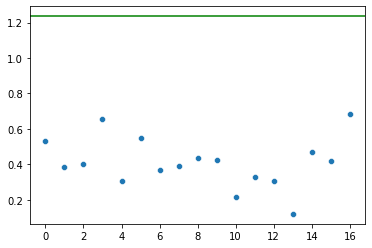

In [26]:
# leverage plot:
u = statistics.mean(leverage_python)
i = np.arange(0,17,1)

graph = sns.scatterplot(x = i,y = leverage_python)
graph.axhline(3*(7/17),color="green")

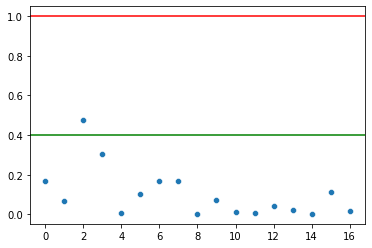

In [27]:
# cooks distance plot:
u = statistics.mean(cooks[0])
i = np.arange(0,17,1)

graph = sns.scatterplot(x = i,y = cooks[0])
graph.axhline(4/(17-6-1),color="green")
graph.axhline(1,color="red")

In [28]:
# the most influencial point.
df.iloc[16,:]

years                      2020.000000
Gold_average_AJ            1773.730000
Gold_closing_AJ            1895.100000
ten_year_TIPS                -0.600000
five_year_TIPS               -0.790000
MSCI_EM                    1052.420000
ten_year_TR                   0.890000
world_gdp                 10925.746100
standardized_residuals        0.216442
studentized_residuals         0.205818
Name: 16, dtype: float64